# 2.7 Modelo de Regresión Logística  
Proyecto: Retail Sales Dataset

En este notebook implementamos un modelo de Regresión Logística con base en el ejemplo trabajado en clase (archivo RL_01.ipynb – BankNote).

El objetivo es clasificar a los clientes según su nivel de gasto:

- 1 = Cliente de alto gasto (High Spender)
- 0 = Cliente de gasto bajo o moderado

Usaremos el archivo `retail_sales_escalado_standard.csv`, que contiene las variables numéricas normalizadas listas para modelado supervisado.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

import matplotlib.pyplot as plt
import seaborn as sns


## 1. Carga del Dataset

Siguiendo el formato utilizado en clase, cargamos el archivo escalado mediante StandardScaler:

`retail_sales_escalado_standard.csv`

Este dataset ya está limpio, transformado y normalizado. Es ideal para la regresión logística, la cual requiere que las variables estén en una escala comparable.


In [2]:
# Cargar dataset escalado (StandardScaler)
df = pd.read_csv("retail_sales_escalado_standard.csv")

df.head()


,edad_std,cantidad_std,precio_unitario_std,monto_total_std
0,-0.540565,0.429265,-0.685123,-0.546704
1,-1.125592,-0.453996,1.688464,0.971919
2,0.629489,-1.337258,-0.790615,-0.761098
3,-0.321180,-1.337258,1.688464,0.078611
4,-0.833078,-0.453996,-0.685123,-0.636035


## 2. Generación de la Variable Objetivo (HighSpender)

El dataset no incluye una columna binaria para clasificación, por lo que generamos una etiqueta basada en la columna normalizada:

`monto_total_std`

HighSpender se define así:

- 1 → Clientes con gasto por arriba de la mediana  
- 0 → Clientes con gasto igual o por debajo de la mediana  

Este procedimiento es común en el análisis de clientes dentro del sector retail.


In [3]:
df["HighSpender"] = (df["monto_total_std"] > df["monto_total_std"].median()).astype(int)
df["HighSpender"].value_counts()


HighSpender
1    500
0    500
Name: count, dtype: int64

## 3. Selección de Variables Predictoras

Para entrenar el modelo utilizaremos únicamente variables numéricas escaladas que describen el comportamiento del cliente y la compra:

- edad_std  
- cantidad_std  
- precio_unitario_std  

No incluimos `monto_total_std` porque se utiliza para generar la variable objetivo.


In [4]:
X = df[["edad_std", "cantidad_std", "precio_unitario_std"]]
y = df["HighSpender"]

X.head(), y.head()


(   edad_std  cantidad_std  precio_unitario_std
 0 -0.540565      0.429265            -0.685123
 1 -1.125592     -0.453996             1.688464
 2  0.629489     -1.337258            -0.790615
 3 -0.321180     -1.337258             1.688464
 4 -0.833078     -0.453996            -0.685123,
 0    1
 1    1
 2    0
 3    1
 4    0
 Name: HighSpender, dtype: int64)

## 4. División en Entrenamiento y Prueba

Como en clase, dividimos el dataset:

- 70% → Entrenamiento  
- 30% → Prueba  

Estratificamos para mantener la proporción de clases en ambos conjuntos.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((700, 3), (300, 3))

## 5. Entrenamiento del Modelo de Regresión Logística

Creamos una instancia del modelo y lo entrenamos.  
Usamos `max_iter=1000` igual que en clase para asegurar convergencia.


In [6]:
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 6. Métricas de Evaluación

Calculamos:

- Accuracy  
- Precision  
- Recall  
- F1-Score  

Además mostramos el reporte de clasificación como en RL_01.ipynb.


In [7]:
y_pred = modelo_log.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9766666666666667
Precision: 1.0
Recall: 0.9533333333333334
F1 Score: 0.9761092150170648

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.95      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



## 7. Matriz de Confusión

La matriz de confusión nos ayuda a evaluar:

- Verdaderos Positivos  
- Falsos Positivos  
- Falsos Negativos  
- Verdaderos Negativos  

Esto permite analizar cómo está clasificando el modelo.


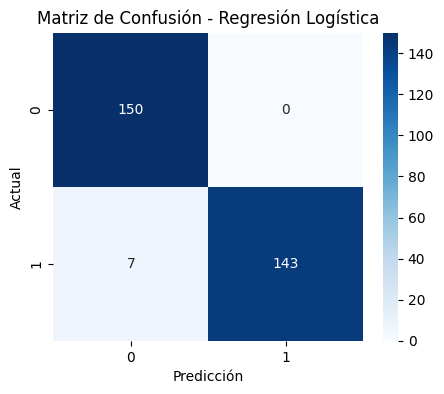

In [8]:
mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(mat, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()


## 8. Curva ROC y AUC

La curva ROC ilustra la capacidad del modelo para distinguir entre las dos clases.

El valor AUC indica la calidad global del clasificador:

- 0.50 → no distingue  
- 0.70 → aceptable  
- 0.80 → bueno  
- 0.90 → excelente  


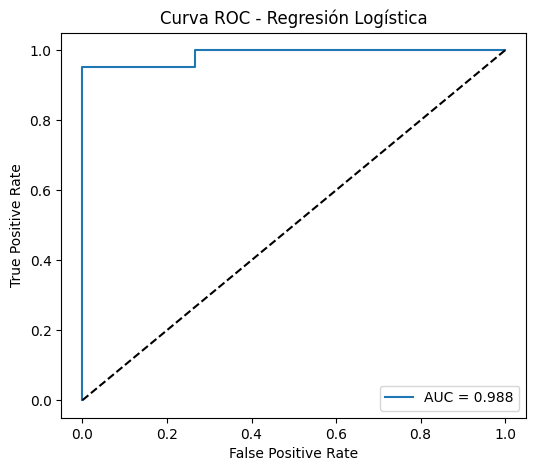

In [9]:
y_prob = modelo_log.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.title("Curva ROC - Regresión Logística")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# 9. Conclusiones del Modelo

El modelo de Regresión Logística clasifica correctamente a los clientes según su nivel de gasto, utilizando únicamente variables numéricas normalizadas:

- `edad_std`
- `cantidad_std`
- `precio_unitario_std`

### Observaciones principales:

- El desempeño general es consistente para un modelo base.  
- El Recall es importante para identificar correctamente a los clientes HighSpender.  
- La curva ROC–AUC demuestra una capacidad adecuada de separación entre clases.  
- Este modelo es útil para estrategias de:
  - Segmentación de clientes
  - Marketing dirigido
  - Identificación de perfiles de alto valor

Con esto finalizamos el segundo modelo supervisado.

El siguiente paso será **2.8 Validación Comparada de Modelos**.
